In [1]:
##Pythonで株価のデータ分析｜株価分析を通してPythonでのデータ分析を学びましょう
##https://www.youtube.com/watch?v=0-fZ47QudYo

#Pandas DataReaderをインストール
!pip install pandas_datareader

In [2]:
#必要なパッケージをインポート
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt

#ワーニング抑止
%matplotlib inline
# pd.core.common.is_list_like = pd.api.types.is_list_like

In [5]:
##ゴールデンクロスを求める
def company_stock_analyse(start, end, company_code):
    #範囲を指定してデータ取得
    df = data.DataReader(company_code, 'stooq')
    df = df[(df.index>=start) & (df.index<=end)]
    df = df.sort_index()

    #X軸、Y軸のデータを抽出
    date = df.index
    price= df['Close']

    #移動平均取得
    span01=5
    span02=25
    span03=50
    df['sma01'] = price.rolling(window=span01).mean()
    df['sma02'] = price.rolling(window=span02).mean()
    df['sma03'] = price.rolling(window=span03).mean()
    
    #GC/DC判定
    gc = False
    dc = False
    nextEntry = False
    payOff = False
    investMoney = 0
    profit = 0
    total = 0
    zero = []
    gcdc = []
    idx_bf = df.index[0]

    for idx in df.index:
        
        if nextEntry :
            nextEntry = False
            investMoney = int(float(df['Open'][idx]) * 100)
            print('idx:' + str(idx) + ',     invest:' + str(investMoney))
                                
        if payOff :
            payOff = False
            if gc :
                gc = False
                profit = int(float(df['Open'][idx]) * 100) - investMoney
                investMoney = 0
                print('idx:' + str(idx) + ',  gc_payoff:' + str(int(float(df['Open'][idx]) * 100)))

            elif dc :
                dc = False
                profit = investMoney - int(float(df['Open'][idx]) * 100)
                investMoney = 0
                print('idx:' + str(idx) + ',  dc_payoff:' + str(int(float(df['Open'][idx]) * 100)))

            total = total + profit                
            print('profit:' + str(profit))
            print('total :' + str(total))

        
        if not gc and not dc :
            # ゴールデンクロス
            if ((df['sma01'][idx] - df['sma01'][idx_bf] > 0)  and
                (df['sma02'][idx] - df['sma02'][idx_bf] > 0) and  
                (df['sma01'][idx_bf] - df['sma02'][idx_bf] < 0) and 
                (df['sma01'][idx] - df['sma02'][idx] > 0)):
                gcdc.append(1)
                gc = True
                nextEntry = True
                print('GC!!')

            # デッドクロス
            elif ((df['sma01'][idx] - df['sma01'][idx_bf] < 0) and 
                  (df['sma02'][idx] - df['sma02'][idx_bf] < 0) and 
                  (df['sma01'][idx_bf] - df['sma02'][idx_bf] > 0) and
                  (df['sma01'][idx] - df['sma02'][idx] < 0)):
                gcdc.append(-1)
                dc = True
                nextEntry = True
                print('DC!!')

            # どちらでもない
            else:
                gcdc.append(0)                

        elif gc  :
            if (df['sma01'][idx] - df['sma02'][idx] >= 0) :
                #ゴールデンクロス継続
                gcdc.append(1)
            else :
                #ゴールデンクロス終了
                gcdc.append(0)
                payOff = True
        
        elif dc  :
            if (df['sma01'][idx] - df['sma02'][idx] <= 0) :
                #デッドクロス継続
                gcdc.append(-1)
            else :
                #デッドクロス終了
                gcdc.append(0)
                payOff = True
                
        zero.append(0)
        idx_bf = idx

        
    df['gcdc'] = gcdc
    df['zero'] = zero

    #print(df.head(100))

    #グラフの大きさを指定
    plt.figure(figsize=(20,10))

    #株価グラフ
    plt.subplot(3,1,1)   # 縦分割数, 横分割数, 配置位置
    plt.plot(date, price, label='Close', color='#99b898')
    plt.plot(date,df['sma01'], label='sma01', color='#e84a5f')
    plt.plot(date,df['sma02'], label='sma02', color='#ff847c')
    plt.plot(date,df['sma03'], label='sma03', color='#feceab')#    plt.legend()

    #GCDC判定グラフ
    plt.subplot(3,1,2)
    plt.plot(date, df['gcdc'], label='Golden Cross', color='red')
    plt.plot(date, df['zero'], color='gray')
    
    #出来高グラフ
    plt.subplot(3,1,3)
    plt.bar(date, df['Volume'], label='Volume', color='grey')

    plt.legend()        

    print('Total Profit = ' + str(total))
        



GC!!
idx:2015-08-24 00:00:00,     invest:358966
idx:2015-08-25 00:00:00,  gc_payoff:346869
profit:-12097
total :-12097
DC!!
idx:2015-09-03 00:00:00,     invest:349131
idx:2015-10-13 00:00:00,  dc_payoff:345000
profit:4131
total :-7966
GC!!
idx:2016-05-30 00:00:00,     invest:262092
idx:2016-06-30 00:00:00,  gc_payoff:279108
profit:17016
total :9050
GC!!
idx:2016-07-06 00:00:00,     invest:281173
idx:2016-07-11 00:00:00,  gc_payoff:272420
profit:-8753
total :297
GC!!
idx:2016-07-14 00:00:00,     invest:293859
idx:2016-07-29 00:00:00,  gc_payoff:262979
profit:-30880
total :-30583
GC!!
idx:2016-08-18 00:00:00,     invest:291106
idx:2016-09-23 00:00:00,  gc_payoff:321593
profit:30487
total :-96
GC!!
idx:2016-09-29 00:00:00,     invest:344214
idx:2016-11-10 00:00:00,  gc_payoff:368800
profit:24586
total :24490
GC!!
idx:2016-11-14 00:00:00,     invest:383160
idx:2016-12-28 00:00:00,  gc_payoff:306448
profit:-76712
total :-52222
GC!!
idx:2017-03-29 00:00:00,     invest:214396
idx:2017-04-18 0

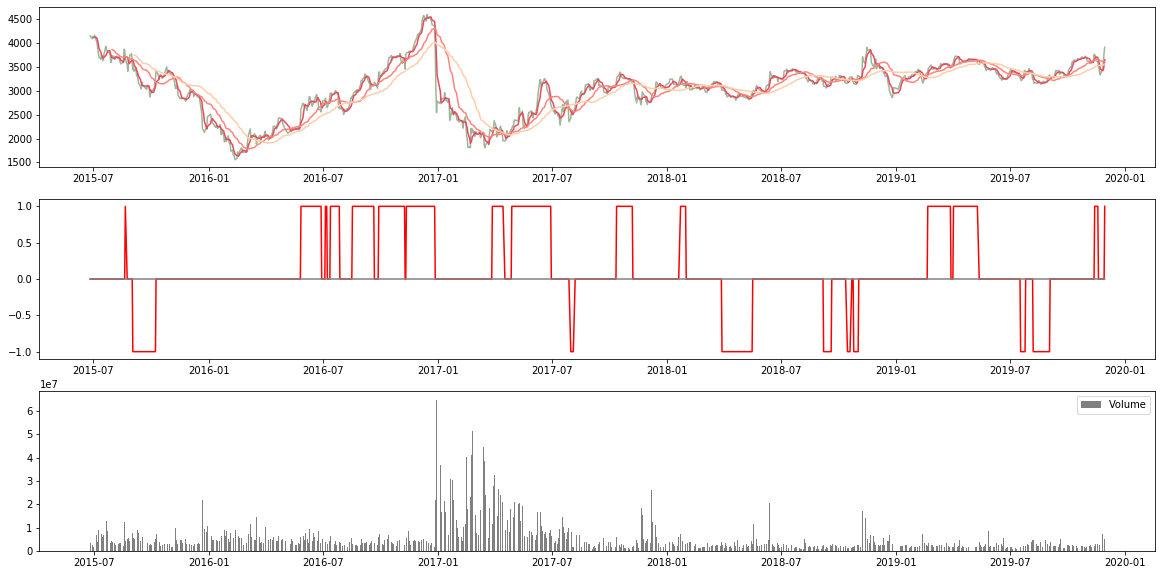

In [6]:
company_stock_analyse('2015-01-01', '2019-12-01', '6502.JP')

In [8]:
##ゴールデンクロスを求める
def company_stock_analyse2(start, end, company_code):
    #範囲を指定してデータ取得
    df = data.DataReader(company_code, 'stooq')
    df = df[(df.index>=start) & (df.index<=end)]
    df = df.sort_index()

    #X軸、Y軸のデータを抽出
    date = df.index
    price= df['Close']

    #移動平均取得
    span01=5
    span02=25
    span03=50
    df['sma01'] = price.rolling(window=span01).mean()
    df['sma02'] = price.rolling(window=span02).mean()
    df['sma03'] = price.rolling(window=span03).mean()
    
    #GC/DC判定
    gc = False
    dc = False
    nextEntry = False
    payOff = False
    investMoney = 0
    profit = 0
    total = 0
    zero = []
    gcdc = []
    idx_bf = df.index[0]

    for idx in df.index:
        
        if nextEntry :
            nextEntry = False
            investMoney = int(float(df['Open'][idx]) * 100)
            print('idx:' + str(idx) + ',     invest:' + str(investMoney))
                                
        if payOff :
            payOff = False
            if gc :
                gc = False
                profit = int(float(df['Open'][idx]) * 100) - investMoney
                investMoney = 0
                print('idx:' + str(idx) + ',  gc_payoff:' + str(int(float(df['Open'][idx]) * 100)))

            elif dc :
                dc = False
                profit = investMoney - int(float(df['Open'][idx]) * 100)
                investMoney = 0
                print('idx:' + str(idx) + ',  dc_payoff:' + str(int(float(df['Open'][idx]) * 100)))

            total = total + profit                
            print('profit:' + str(profit))
            print('total :' + str(total))

        
        if not gc and not dc :
            # ゴールデンクロス
            if ((df['sma01'][idx] - df['sma01'][idx_bf] > 0)  and
                (df['sma02'][idx] - df['sma02'][idx_bf] > 0) and  
                (df['sma01'][idx_bf] - df['sma02'][idx_bf] < 0) and 
                (df['sma01'][idx] - df['sma02'][idx] > 0)):
                gcdc.append(1)
                gc = True
                nextEntry = True
                print('GC!!')

            # デッドクロス
            elif ((df['sma01'][idx] - df['sma01'][idx_bf] < 0) and 
                  (df['sma02'][idx] - df['sma02'][idx_bf] < 0) and 
                  (df['sma01'][idx_bf] - df['sma02'][idx_bf] > 0) and
                  (df['sma01'][idx] - df['sma02'][idx] < 0)):
                gcdc.append(-1)
                dc = True
                nextEntry = True
                print('DC!!')

            # どちらでもない
            else:
                gcdc.append(0)                

        elif gc  :
            if (df['Close'][idx] - df['sma02'][idx] >= 0) :
                #ゴールデンクロス継続
                gcdc.append(1)
            else :
                #ゴールデンクロス終了
                gcdc.append(0)
                payOff = True
        
        elif dc  :
            if (df['Close'][idx] - df['sma02'][idx] <= 0) :
                #デッドクロス継続
                gcdc.append(-1)
            else :
                #デッドクロス終了
                gcdc.append(0)
                payOff = True
                
        zero.append(0)
        idx_bf = idx

        
    df['gcdc'] = gcdc
    df['zero'] = zero

    #print(df.head(100))

    #グラフの大きさを指定
    plt.figure(figsize=(20,10))

    #株価グラフ
    plt.subplot(3,1,1)   # 縦分割数, 横分割数, 配置位置
    plt.plot(date, price, label='Close', color='#99b898')
    plt.plot(date,df['sma01'], label='sma01', color='#e84a5f')
    plt.plot(date,df['sma02'], label='sma02', color='#ff847c')
    plt.plot(date,df['sma03'], label='sma03', color='#feceab')#    plt.legend()

    #GCDC判定グラフ
    plt.subplot(3,1,2)
    plt.plot(date, df['gcdc'], label='Golden Cross', color='red')
    plt.plot(date, df['zero'], color='gray')
    
    #出来高グラフ
    plt.subplot(3,1,3)
    plt.bar(date, df['Volume'], label='Volume', color='grey')

    plt.legend()        

    print('Total Profit = ' + str(total))
        



DC!!
idx:2015-09-30 00:00:00,     invest:619964
idx:2015-10-02 00:00:00,  dc_payoff:640590
profit:-20626
total :-20626
GC!!
idx:2015-10-07 00:00:00,     invest:660036
idx:2015-11-17 00:00:00,  gc_payoff:682114
profit:22078
total :1452
DC!!
idx:2015-12-15 00:00:00,     invest:677755
idx:2015-12-18 00:00:00,  dc_payoff:697834
profit:-20079
total :-18627
GC!!
idx:2015-12-24 00:00:00,     invest:696471
idx:2015-12-25 00:00:00,  gc_payoff:683568
profit:-12903
total :-31530
DC!!
idx:2016-02-09 00:00:00,     invest:567899
idx:2016-03-11 00:00:00,  dc_payoff:551270
profit:16629
total :-14901
DC!!
idx:2016-04-04 00:00:00,     invest:517922
idx:2016-04-22 00:00:00,  dc_payoff:524921
profit:-6999
total :-21900
GC!!
idx:2016-04-26 00:00:00,     invest:541367
idx:2016-05-02 00:00:00,  gc_payoff:491029
profit:-50338
total :-72238
DC!!
idx:2016-05-09 00:00:00,     invest:502296
idx:2016-05-11 00:00:00,  dc_payoff:519378
profit:-17082
total :-89320
GC!!
idx:2016-06-01 00:00:00,     invest:518014
idx:2

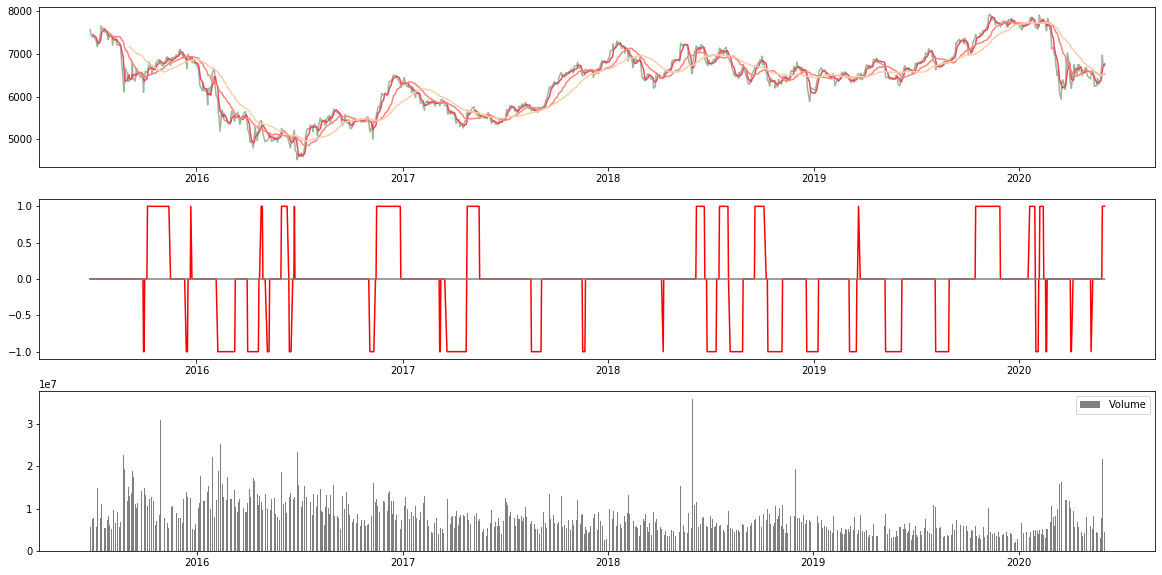

In [9]:
company_stock_analyse2('2015-01-01', '2020-06-01', '7203.JP')